<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo70/blob/main/Semana4_5to11Oct/M%C3%B3dulo3_ActividadSemana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### **Módulo 3 - Actividad de Semana 4**

---

### Datos generales
---
> Nombre de la entrega: **Módulo 3 - Actividad de Semana 4**
---
* Equipo 70 - Integrantes: 

  * Javier Pérez Sanagustín
  * Herbert Joadan Romero Villarreal

* Matrículas: 

  * A01794233
  * A01794199

* Materia: Ciencia y analítica de datos (Gpo 10)

* Profesor titular: Jobish Vallikavungal

* Profesor tutor: Bernardo Charles Canales

* Fecha: 11 de octubre de 2022





### Pre-Requisito
En esta Actividad de la Semana 4, el objetivo principal es aplicar PCA al conjunto de datos para finalmente determinar la importancia de los componentes principales y generar una conclusión sobre el método.

PCA requiere que los datos de entrada se encuentren limpios, es decir, que no existan valores nulos o que generen ruido. Por ello, en esta sección que hemos nombrado como pre-requisito, importaremos la base de datos cuya limpieza se aplicó en la Actividad 3 de este mismo módulo.






Se inicia con la importación de la Base de datos limpia. Se importan las librerías de pandas, numpy  y seaborn como parte de la práctica. Se crea el data frame con los datos ya limpios.

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Path del csv
csv_path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo70/main/Semana4_5to11Oct/clean_db.csv'
clean_df = pd.read_csv(csv_path, index_col=0) # csv a un DataFrame
df = clean_df.copy() # Copia para trabajar el DataFrame
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.000000,2.000000,1.000000,1.000000,1.840343,...,1.840343,1.840343,1.840343,1.840343,689.0,1.840343,1.840343,1.840343,1.840343,1.000000
2,120000,2.0,2.0,2.0,26.0,1.000000,2.000000,1.840343,1.840343,1.840343,...,3272.000000,3455.000000,3261.000000,1.840343,1000.0,1000.000000,1000.000000,1.840343,2000.000000,1.000000
3,90000,2.0,2.0,2.0,34.0,1.840343,1.840343,1.840343,1.840343,1.840343,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.0,1000.000000,1000.000000,1000.000000,5000.000000,1.840343
4,50000,2.0,2.0,1.0,37.0,1.840343,1.840343,1.840343,1.840343,1.840343,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.0,1200.000000,1100.000000,1069.000000,1000.000000,1.840343
5,50000,1.0,2.0,1.0,57.0,1.000000,1.840343,1.000000,1.840343,1.840343,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.0,10000.000000,9000.000000,689.000000,679.000000,1.840343


## Parte 1: Ejercicio guiado 

**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

* Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.


Recordemos que PCA es un método que se aplica solo a variables continuas (numéricas), por lo que con info, podremos ver a detalle el tipo de las columnas.

In [ ]:
df.info() # Vemos el tipo de las columnas del df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X2      29958 non-null  float64
 2   X3      29958 non-null  float64
 3   X4      29958 non-null  float64
 4   X5      29958 non-null  float64
 5   X6      29958 non-null  float64
 6   X7      29958 non-null  float64
 7   X8      29958 non-null  float64
 8   X9      29958 non-null  float64
 9   X10     29958 non-null  float64
 10  X11     29958 non-null  float64
 11  X12     29958 non-null  float64
 12  X13     29958 non-null  float64
 13  X14     29958 non-null  float64
 14  X15     29958 non-null  float64
 15  X16     29958 non-null  float64
 16  X17     29958 non-null  float64
 17  X18     29958 non-null  float64
 18  X19     29958 non-null  float64
 19  X20     29958 non-null  float64
 20  X21     29958 non-null  float64
 21  X22     29958 non-null  float64
 22

Pero, en la información o descripción de la base de datos, podemos ver que a pesar de que la información está representada en números, existen variables que son categóricas: X2,X3 y X4
Por ello, eliminaremos esas variables del análisis de PCA junto con la variable de resultado Y.

In [ ]:
df = df.drop(['X2', 'X3', 'X4', 'Y'], axis=1)
df

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,,,,,,,
1,20000,24.0,2.000000,2.000000,1.000000,1.000000,1.840343,1.840343,3913.0,3102.0,689.0,1.840343,1.840343,1.840343,1.840343,689.000000,1.840343,1.840343,1.840343,1.840343
2,120000,26.0,1.000000,2.000000,1.840343,1.840343,1.840343,2.000000,2682.0,1725.0,2682.0,3272.000000,3455.000000,3261.000000,1.840343,1000.000000,1000.000000,1000.000000,1.840343,2000.000000
3,90000,34.0,1.840343,1.840343,1.840343,1.840343,1.840343,1.840343,29239.0,14027.0,13559.0,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
4,50000,37.0,1.840343,1.840343,1.840343,1.840343,1.840343,1.840343,46990.0,48233.0,49291.0,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
5,50000,57.0,1.000000,1.840343,1.000000,1.840343,1.840343,1.840343,8617.0,5670.0,35835.0,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,1.840343,1.840343,1.840343,1.840343,1.840343,1.840343,188948.0,192815.0,208365.0,88004.000000,31237.000000,15980.000000,8500.000000,20000.000000,5003.000000,3047.000000,5000.000000,1000.000000
29997,150000,43.0,1.000000,1.000000,1.000000,1.000000,1.840343,1.840343,1683.0,1828.0,3502.0,8979.000000,5190.000000,1.840343,1837.000000,3526.000000,8998.000000,129.000000,1.840343,1.840343
29998,30000,37.0,4.000000,3.000000,2.000000,1.000000,1.840343,1.840343,3565.0,3356.0,2758.0,20878.000000,20582.000000,19357.000000,1.840343,1.840343,22000.000000,4200.000000,2000.000000,3100.000000


Tenemos todas las variables continuas, entonces llevaremos a cabo el análisis para todas las variables.

Veamos la correlación que existe entre las variables, esto nos dará una idea del trabajo que PCA puede hacer.

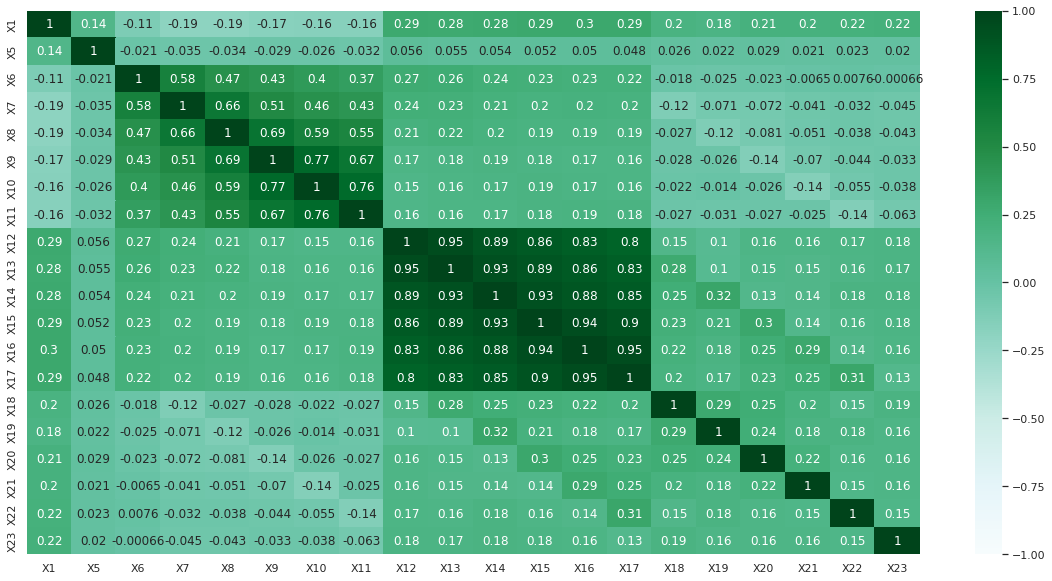

In [ ]:
# Generamos matriz de correlación
corrs = df.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

Las casillas con verde oscuro o de color blanco son las que están
mayor correlacionadas. Mientras más oscuro es el verde, más estrecha es la correlación positiva (a medida que uno crece, la otra también lo hace). El hecho que algunas variables estén más correlacionadas significa para el
modelo información repetida.

El método PCA utiliza las varianzas para determinar correlaciones y separar en componentes dicha información, por lo que veremos como son las varianzas de la información original.

In [ ]:
#Buscamos la varianza total de todas las variables
var_total = df.var().sum()

#Calculamos la varianza de cada columna
lista_varianza_original = {}
for column in df.columns:
  lista_varianza_original[column] = [((df[column].var()/var_total)*100)]
temp_df = pd.DataFrame(lista_varianza_original)
display(temp_df)
print('Varianza Total \t:',var_total)

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,37.065492,1.869677e-07,5.231729e-10,4.097346e-10,4.050689e-10,4.426590e-10,4.300312e-10,4.094533e-10,11.94279,11.155074,10.588353,9.108927,8.134743,7.793537,0.60453,1.170588,0.683463,0.541147,0.514511,0.696845


Varianza Total 	: 45410881789.32356


Como podemos ver, las varianzas son muy diferentes para cada tipo de dato. Por ello, si aplicamos PCA, tomaría algunas variables como más importantes cuando en realidad no lo son. Por ello, requerimos aplicar una transformación y tener los datos en el mismo rango.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.137363,-1.246282,0.783531,0.656020,-1.672264,-1.612069,0.264246,0.289578,-0.643392,-0.648480,-0.669272,-0.674051,-0.664694,-0.656071,-0.341800,-0.227149,-0.296701,-0.308017,-0.314033,-0.293408
1,-0.366561,-1.029224,-1.268126,0.656020,0.287120,0.262275,0.264246,0.659843,-0.660108,-0.667827,-0.640530,-0.623204,-0.607878,-0.601286,-0.341800,-0.213660,-0.240041,-0.244342,-0.314033,-0.181080
2,-0.597802,-0.160996,0.455970,0.285882,0.287120,0.262275,0.264246,0.289578,-0.299485,-0.494978,-0.483666,-0.451252,-0.418779,-0.394728,-0.250291,-0.191973,-0.240041,-0.244342,-0.248731,-0.012432
3,-0.906122,0.164590,0.455970,0.285882,0.287120,0.262275,0.264246,0.289578,-0.058441,-0.014367,0.031646,-0.233834,-0.188251,-0.159426,-0.221200,-0.169462,-0.228689,-0.237963,-0.244217,-0.237296
4,-0.906122,2.335161,-1.268126,0.285882,-1.672264,0.262275,0.264246,0.289578,-0.579515,-0.612398,-0.162411,-0.348490,-0.349708,-0.334516,-0.221200,1.333952,0.270831,0.265998,-0.269077,-0.255341


Una vez que realizamos la transformación estándar podemos ver que los datos se aproximan al 0, en lugar de tener valores de magnitudes muy grandes o muy pequeñas. Observamos ahora las varianzas:

In [ ]:
summary = {
"Varianzas": scaled_df[df.columns.values].var()[0:20],
"Valor Min": scaled_df[df.columns.values].min()[0:20],
"Valor Max": scaled_df[df.columns.values].max()[0:20]
}

# Podemos ver como DataFrame las varianzas
pd.DataFrame(summary, index = df.columns.values).transpose()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.214443,-1.571867,-1.268126,-1.662313,-1.672264,-1.612069,-1.637419,-1.659287,-0.696514,-0.692050,-0.679194,-0.674064,-0.664708,-0.656085,-0.341851,-0.256990,-0.296748,-0.308071,-0.314088,-0.293455
Valor Max,6.416489,4.722789,13.093470,14.566023,14.649265,14.001086,14.203317,14.574623,12.400766,13.132635,23.319598,13.188910,14.590381,15.509182,52.381950,72.795294,50.565615,39.307010,27.590609,29.425929


Con el DataFrame de arriba podemos ver que los valores se han reducido y que las varianzas han quedado todas de la misma magnitud.

Ahora procedemos a aplicar PCA. De los datos obtenidos creamos un DataFrame para visualizar los datos de la varianza explicada y la varianza acumulada.

In [ ]:
from sklearn.decomposition import PCA
pcs = PCA()
# Aplicamos PCA a nuestro conjunto de datos escalado
pcs_t = pcs.fit_transform(scaled_df)
pcsSummary_df = pd.DataFrame({
  '% varianza explicada': np.round(pcs.
  explained_variance_ratio_,4) * 100,
  '% varianza acumulada': np.cumsum(pcs.
  explained_variance_ratio_) * 100
})
pcs_labels = [f'Component_{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
Component_1,31.54,31.541494
Component_2,18.77,50.315547
Component_3,7.37,57.689867
Component_4,5.14,62.832572
Component_5,4.98,67.816199
Component_6,4.52,72.333528
Component_7,4.38,76.710749
Component_8,4.10,80.812154
Component_9,3.95,84.760225
Component_10,3.69,88.452035


In [ ]:
pcs_df = pd.DataFrame(pcs_t, columns = pcs_labels)
print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  20.000667623593813
Varianza total de los componentes:  20.00066762359382


Podemos ver que tenemos la lista de componentes, que por definición, no son lo mismo que las variables de entrada. Estos componentes separan la relación entre variables de tal manera que podemos tener la información de forma más atómica.

Ahora veamos las varianzas entre variables para los datos escalados.

In [ ]:
total_var = scaled_df.var().sum()
pd.DataFrame({
"Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
"Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *
100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,5.0,5.0
X5,5.0,10.0
X6,5.0,15.0
X7,5.0,20.0
X8,5.0,25.0
X9,5.0,30.0
X10,5.0,35.0
X11,5.0,40.0
X12,5.0,45.0
X13,5.0,50.0


Con esta información podemos responder la pregunta de la Parte 1.
Podemos ver que con los 10 primeros Componentes, estamos abarcando el 88% de la información, en cambio, necesitaríamos al menos 17 variables originales para abarcar el mismo porcentaje si usáramos el conjunto de datos sin PCA.

**Paso 2: Interprete cada componente principal en términos de las variables originales**

* Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

Para visualizar cada componente en términos de las variables originales, obtendremos los pesos de cada uno de los componentes. Para ello, usaremos el DataFrame con los datos escalados.

In [ ]:
comparacion_df = pd.DataFrame(
pcs.components_.round(4), #pcs.components nos da los pesos de cada componente
columns = pcs_df.columns, #Todas nuestras columnas de componentes
index = scaled_df.columns) #Y las columnas del DF escalado

#Como determinamos que son 10 los componentes principales
#Le decimos que solo queremos ver eso del DataFrame
comparacion_df.iloc[:,:10] #La estructura es [filas, columnas]

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10
X1,0.1128,0.0221,0.1590,0.1529,0.1553,0.1492,0.1457,0.1423,0.3561,0.3659
X5,0.2544,0.0544,-0.2639,-0.3332,-0.3749,-0.3921,-0.3794,-0.3582,0.0791,0.0830
X6,0.1180,0.0004,0.0464,0.0041,0.0939,0.1775,0.2048,0.1825,-0.2110,-0.1850
X7,-0.3076,-0.9139,0.0743,0.0706,-0.0079,-0.0896,-0.1150,-0.0864,0.0036,0.0114
X8,-0.1005,-0.0742,-0.3458,-0.3378,-0.1442,0.0689,0.2109,0.2593,-0.0264,0.0388
X9,-0.1054,0.1796,0.1109,0.1237,0.0315,-0.1146,-0.1339,0.0521,-0.0348,-0.0525
X10,-0.1195,0.1057,0.0318,0.0326,-0.0268,-0.0082,0.0181,-0.0655,-0.0579,-0.0561
X11,-0.3176,0.2267,0.4266,0.3003,0.0253,-0.1793,-0.2440,-0.2843,0.0116,0.0527
X12,0.0279,-0.0245,0.0738,0.0697,-0.0132,-0.1305,0.0714,-0.0078,0.0088,-0.0395
X13,0.0635,-0.0196,-0.0087,0.0536,-0.1489,0.0073,0.0350,0.0725,0.0014,-0.1318


De la información anterior podemos ver como cada variable de entrada contribuye a los valores de cada componente. Es decir, podemos observar la magnitud y la dirección de los coeficientes de las variables originales.
Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente. Para ello, podemos visualizar que variable con valor absoluto contribuye de mayor forma a cada componente:


In [ ]:
comparacion_df.iloc[:,:10].abs().idxmax()

Component_1     X14
Component_2      X7
Component_3     X15
Component_4     X16
Component_5     X18
Component_6     X19
Component_7     X19
Component_8     X16
Component_9     X17
Component_10    X23
dtype: object

Es comun ver que para más de un componente, hay una variable de entrada que es la que más aporta información.

**Paso 3: Identifique valores atípicos**
* Realice alguna gráfica de valores atípicos o boxplot para identificar los 
valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.


Identificaremos valores atípicos para las variables de entrada X1 y X5:

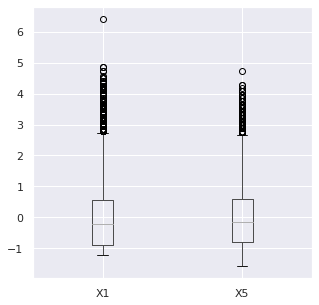

In [ ]:
scaled_df.boxplot(column=['X1', 'X5'], figsize=(5,5))

Lo que nos dice la gráfica es que, sí tenemos valores atípicos outliers.

## Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook



* ¿Cuál es el número de componentes mínimo y por qué?
> No existe una regla para determinal el número de componentes mínimo, pero la clave en PCA es dejar de agregar componentes en medida que su aportación siga siendo relevante, es decir, cuando los pesos o contribución del componente se vuelva insignificante, se tendrá que detener. En el caso de este ejercicio se consideraron 10 componentes.
* ¿Cuál es la variación de los datos que representan esos componentes?
> En este ejercicio se consideraron 10 componentes principales que conforman hasta el 88% de la varianza acumulada.
* ¿Cuál es la pérdida de información después de realizar PCA?
> Aproximadamente 12% de la información que se refleja en 10 componentes. Por esta razón, podemos decir que en los primeros 10 componentes se encuentra el 88% de la información. Además, de la pérdida de información por parte de la limpieza de la base de datos, sin embargo, fueron mínimos, debido a que la cantidad de campos con valores Nan era chico a comparación de la cantidad de registros en el data set. También la correción con el uso de la mediana, ayuda que no haya perdida de información, así asegurando el 88% de información. 
* De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
> Las variables con mayor importancia son: X14, X7 y X15 que corresponden a Amount of bill statement y History of past payment. Las variables con menor importancia son: X17 y X23 que corresponden a Amount of bill statement y Amount of previous payment.
* ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
> El objetivo principal de PCA es reducir las dimensiones de los datos, sobre todo en data sets que son grandes. Con ello, poder transformarlo en variables más chicas, con la misma información del conjunto de datos completo. Entonces, supongamos que tenemos un modelo sobreentrenado, la reducción de dimensiones o reducción de la complejidad del modelo entorno a los datos, suele ser un factor. Por ello, el método de PCA está recomendado en modelos de machile learning que tienen a sobreentrenarse cuando existen demasiados features en donde algunos aportan más información que otros.
